In [6]:
import pandas as pd
import numpy as np

In [5]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv


Saved under data.csv


In [261]:
df = pd.read_csv('data.csv')

In [262]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [152]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [153]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [154]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [155]:
for col in strings:
    df[col] =  df[col].str.lower().str.replace(' ','_')

In [156]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [157]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:3])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat']
48

model
['1_series_m' '1_series' '100']
914

year
[2011 2012 2013]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)']
10

engine_hp
[335. 300. 230.]
356

engine_cylinders
[6. 4. 5.]
9

transmission_type
['manual' 'automatic' 'automated_manual']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive']
4

number_of_doors
[2. 4. 3.]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan']
16

highway_mpg
[26 28 27]
59

city_mpg
[19 20 18]
69

popularity
[3916 3105  819]
48

msrp
[46135 40650 36350]
6049



In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

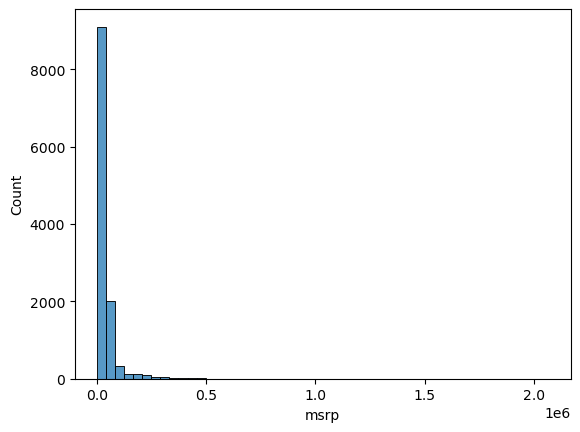

In [159]:
sns.histplot(df.msrp, bins = 50)

<Axes: xlabel='msrp', ylabel='Count'>

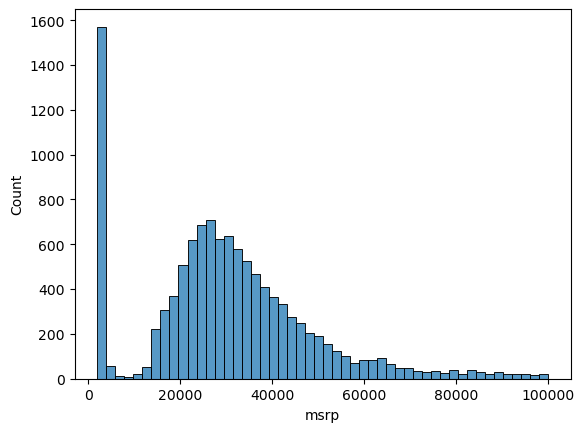

In [160]:
 sns.histplot(df.msrp[df.msrp<100000], bins = 50)

In [161]:
np.log1p([0, 1, 10, 1000, 10000])

array([0.        , 0.69314718, 2.39789527, 6.90875478, 9.21044037])

In [162]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

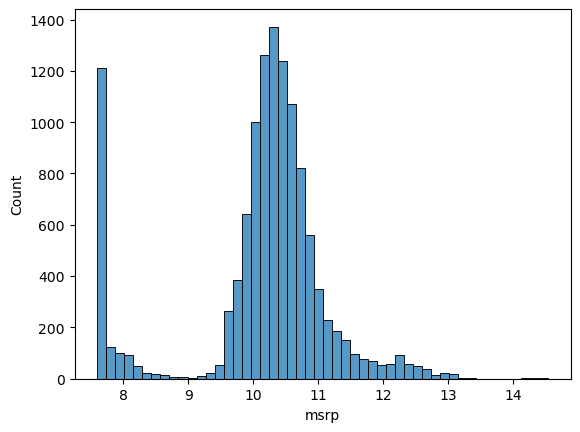

In [163]:
 sns.histplot(price_logs, bins = 50)

In [164]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [165]:
n = len(df)
n_val  = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_test - n_val

In [166]:
n_train, n_test, n_val

(7150, 2382, 2382)

In [167]:
idx = np.arange(n)

np.random.seed(2)
np.random.shuffle(idx)

In [168]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [169]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [170]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [171]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [172]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [173]:
len(y_train)

7150

In [174]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,kia,sorento,2015,regular_unleaded,290.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,24,18,1720
1,toyota,rav4,2016,regular_unleaded,176.0,4.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,31,24,2031
2,buick,encore,2015,regular_unleaded,138.0,4.0,automatic,front_wheel_drive,4.0,crossover,compact,4dr_suv,33,25,155
3,dodge,dakota,2010,regular_unleaded,210.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,compact,extended_cab_pickup,20,15,1851
4,chevrolet,trax,2015,regular_unleaded,138.0,4.0,automatic,front_wheel_drive,4.0,crossover,compact,4dr_suv,34,26,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,ferrari,575m,2004,premium_unleaded_(required),515.0,12.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,16,9,2774
7146,gmc,envoy_xuv,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549
7147,volkswagen,golf_r,2017,premium_unleaded_(recommended),292.0,4.0,manual,all_wheel_drive,4.0,"hatchback,factory_tuner,high-performance",compact,4dr_hatchback,31,22,873
7148,volvo,960,1995,regular_unleaded,181.0,6.0,automatic,rear_wheel_drive,4.0,luxury,midsize,wagon,23,15,870


In [175]:
df_train.iloc[10]

make                              toyota
model                               t100
year                                1997
engine_fuel_type        regular_unleaded
engine_hp                          190.0
engine_cylinders                     6.0
transmission_type                 manual
driven_wheels           four_wheel_drive
number_of_doors                      2.0
market_category                      NaN
vehicle_size                       large
vehicle_style        extended_cab_pickup
highway_mpg                           17
city_mpg                              15
popularity                          2031
Name: 10, dtype: object

In [176]:
xi = [235, 16, 16]

In [177]:
w0 = 8.36
w = [0.01, 0.04, 0.006]
w_new = [w0] + w

In [178]:
def dot(xi,w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [179]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [180]:
linear_regression(xi)

11.446

In [181]:
X = [[148, 23, 2334],
[234, 16, 1556],
[145, 24, 895],
[106, 19, 1689],
[260, 10, 1007],
[98, 29, 1907]]
X = np.array(X)
X

array([[ 148,   23, 2334],
       [ 234,   16, 1556],
       [ 145,   24,  895],
       [ 106,   19, 1689],
       [ 260,   10, 1007],
       [  98,   29, 1907]])

In [182]:
X.shape

(6, 3)

In [183]:
y = [14000, 18000, 15052, 12000, 14700, 8600 ]

In [184]:
w0, w

(8.36, [0.01, 0.04, 0.006])

In [185]:
X.shape

(6, 3)

In [186]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [187]:
train_linear_regression(X, y)

(6690.522452609715, array([38.95892033, 49.54914006, -0.25509914]))

In [188]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [192]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [193]:
x_train = df_train[base].values

In [194]:
x_train = df_train[base].fillna(100).values

In [195]:
w0, w = train_linear_regression(x_train, y_train)

In [196]:
y_pred = w0 + x_train.dot(w)

<Axes: ylabel='Count'>

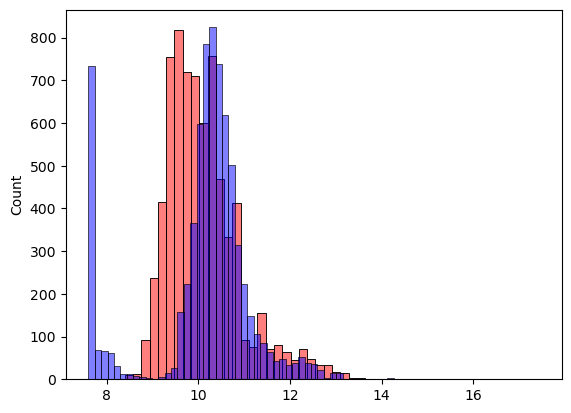

In [197]:
sns.histplot(y_pred, color='red', alpha = 0.5, bins=50)
sns.histplot(y_train, color='blue', alpha = 0.5, bins=50)

In [198]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [200]:
rmse(y_train, y_pred)

0.7688055218781353

In [201]:
def prepare(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [202]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [203]:
x_train = prepare(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

0.7395659285255977

In [204]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [205]:
df_train.year.max()

2017

In [142]:
# def prepare(df):
#     df['age'] = 2017 - df.year
#     features = base + ['age']
#     df_num = df[features]
#     df_num = df_num.fillna(0)
#     X = df_num.values
#     return X

In [143]:
x_train = prepare(df_train)
x_train

array([[3.170e+02, 8.000e+00, 1.800e+01, 1.200e+01, 2.009e+03, 2.000e+00],
       [2.500e+02, 5.000e+00, 2.600e+01, 1.900e+01, 8.700e+02, 1.000e+00],
       [3.100e+02, 8.000e+00, 1.700e+01, 1.300e+01, 1.385e+03, 3.000e+00],
       ...,
       [4.200e+02, 8.000e+00, 2.200e+01, 1.500e+01, 1.624e+03, 0.000e+00],
       [2.000e+02, 4.000e+00, 3.400e+01, 2.500e+01, 1.050e+02, 3.000e+00],
       [5.100e+02, 8.000e+00, 1.900e+01, 1.300e+01, 2.580e+02, 3.000e+00]])

In [144]:
x_train = prepare(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

0.5065078488707871

<Axes: ylabel='Count'>

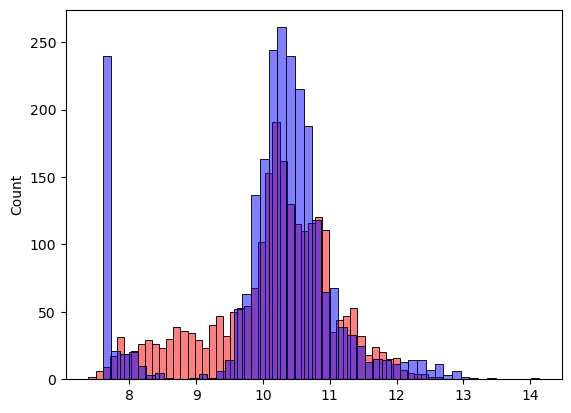

In [145]:
sns.histplot(y_pred, color='red', alpha = 0.5, bins=50)
sns.histplot(y_val, color='blue', alpha = 0.5, bins=50)

In [146]:
df_train.number_of_doors

0       4.0
1       4.0
2       3.0
3       4.0
4       2.0
       ... 
7145    2.0
7146    4.0
7147    4.0
7148    2.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [147]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,age
0,nissan,armada,2015,regular_unleaded,317.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,4dr_suv,18,12,2009,2
1,volvo,xc70,2016,regular_unleaded,250.0,5.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,wagon,26,19,870,1
2,chevrolet,express,2014,flex-fuel_(unleaded/e85),310.0,8.0,automatic,rear_wheel_drive,3.0,flex_fuel,midsize,passenger_van,17,13,1385,3
3,chrysler,300,2016,regular_unleaded,300.0,6.0,automatic,rear_wheel_drive,4.0,performance,large,sedan,31,19,1013,1
4,nissan,truck,1996,regular_unleaded,134.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,regular_cab_pickup,18,15,2009,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,pontiac,sunfire,2004,regular_unleaded,140.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,23,210,13
7146,volvo,xc60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,31,24,870,2
7147,cadillac,escalade,2017,premium_unleaded_(recommended),420.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,4dr_suv,22,15,1624,0
7148,scion,fr-s,2014,premium_unleaded_(required),200.0,4.0,automatic,rear_wheel_drive,2.0,performance,compact,coupe,34,25,105,3


In [148]:
# def prepare(df):
#     df = df.copy()
#     features = base.copy()
#     df['age'] = 2017 - df.year
#     features.append('age')
    
#     for v in [2, 3, 4]:
#         df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
#         features.append('num_doors_%s' % v)
    
#     df_num = df[features]
#     df_num = df_num.fillna(0)
#     X = df_num.values
#     return X

In [65]:
# x_train = prepare(df_train)
# w0, w = train_linear_regression(x_train, y_train)

# x_val = prepare(df_val)
# y_pred = w0 + x_val.dot(w)

# rmse(y_val, y_pred)

In [66]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [67]:
# def prepare(df):
#     df = df.copy()
#     features = base.copy()
    
#     df['age'] = 2017 - df.year
#     features.append('age')
    
#     for v in [2, 3, 4]:
#         df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
#         features.append('num_doors_%s' % v)
    
#     for v in makes:
#         df['makes_%s' % v] = (df.make == v).astype('int')
#         features.append('makes_%s' % v)
        
#     df_num = df[features]
#     df_num = df_num.fillna(0)
#     X = df_num.values
#     return X

In [68]:
# x_train = prepare(df_train)
# w0, w = train_linear_regression(x_train, y_train)

# x_val = prepare(df_val)
# y_pred = w0 + x_val.dot(w)

# rmse(y_val, y_pred)

In [206]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [207]:
categories_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels' ,
'market_category', 'vehicle_size', 'vehicle_style'
]

In [208]:
categories = {}
for v in categories_variables:
    categories[v] = list(df[v].value_counts().head().index)


In [209]:
categories.items()

dict_items([('make', ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']), ('engine_fuel_type', ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']), ('transmission_type', ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']), ('driven_wheels', ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']), ('market_category', ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']), ('vehicle_size', ['compact', 'midsize', 'large']), ('vehicle_style', ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback'])])

In [228]:
def prepare(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c , values in categories.items():
        for v in values:
            df['%s_%s' %(c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' %(c, v))
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [229]:
x_train = prepare(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

139.76656807980632

In [230]:
w

array([-2.89739037e-01,  9.86873801e+00,  8.79317073e-01, -8.18280957e+00,
       -2.63433689e-03, -3.40174125e+00, -2.08910651e+03, -2.10390569e+03,
       -2.09702218e+03,  4.82321955e+00,  1.42011033e+01, -9.87550288e+00,
        4.96715067e-01, -2.80515681e+00,  1.45594815e+02,  1.48727119e+02,
        1.35531110e+02,  1.29296763e+02,  3.42273771e+02,  1.91659903e+16,
        1.91659903e+16,  1.91659903e+16,  1.91659903e+16,  1.91659903e+16,
       -1.35294357e+16, -1.35294357e+16, -1.35294357e+16, -1.35294357e+16,
       -2.06388955e+01, -8.60647127e+00,  8.57998069e+00,  1.70946825e+01,
       -6.82693034e+00,  2.17354703e+02,  2.22982501e+02,  1.99074581e+02,
       -6.47885624e-02,  3.57315282e-02,  1.84471554e-01,  3.30044966e-01,
       -1.63638322e-01])

In [231]:
def train_linear_regression_reg(X, y, r =0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [232]:
x_train = prepare(df_train)
w0, w = train_linear_regression_reg(x_train, y_train, r=0.01)

x_val = prepare(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

0.4570714378828949

<Axes: ylabel='Count'>

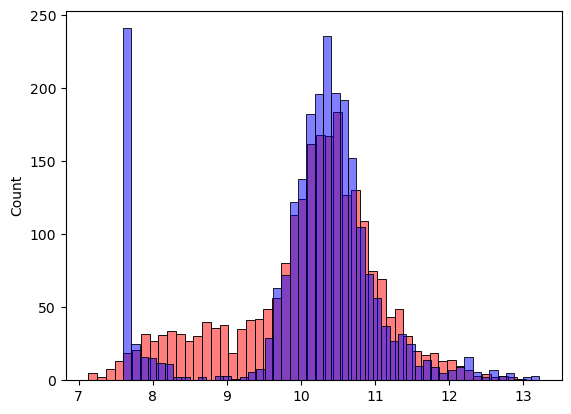

In [233]:
sns.histplot(y_pred, color='red', alpha = 0.5, bins=50)
sns.histplot(y_val, color='blue', alpha = 0.5, bins=50)

In [234]:
for r in [0.0, 0.001, 0.00001, 0.1, 0.01, 0.001, 10]:
    x_train = prepare(df_train)
    w0, w = train_linear_regression_reg(x_train, y_train, r=r)

    x_val = prepare(df_val)
    y_pred = w0 + x_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0 ,score)


0.0 -5636554549961899.0 139.76656807980632
0.001 6.376323149613454 0.4570704893333785
1e-05 9.173047156942612 0.45707041247577157
0.1 6.241293565635252 0.457106170191656
0.01 6.363126695797577 0.4570714378828949
0.001 6.376323149613454 0.4570704893333785
10 4.257431002570217 0.4735173908198434


In [235]:
r=0.1
x_train = prepare(df_train)
w0, w = train_linear_regression_reg(x_train, y_train, r=r)

x_val = prepare(df_val)
y_pred = w0 + x_val.dot(w)

score = rmse(y_val, y_pred)
score

0.457106170191656

In [236]:
df_full_train = pd.concat([df_train, df_val])

In [237]:
df_full_train = df_full_train.reset_index(drop = True)

In [239]:
X_full_train = prepare(df_full_train)
X_full_train

array([[290.,   6.,  24., ...,   0.,   0.,   0.],
       [176.,   4.,  31., ...,   0.,   0.,   0.],
       [138.,   4.,  33., ...,   0.,   0.,   0.],
       ...,
       [180.,   4.,  42., ...,   0.,   0.,   0.],
       [250.,   5.,  26., ...,   0.,   0.,   0.],
       [332.,   6.,  26., ...,   1.,   0.,   0.]])

In [242]:
 y_full_train = np.concatenate([y_train, y_val])

In [243]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.1)

In [246]:
x_test = prepare(df_test)
y_pred = w0 + x_test.dot(w)

score = rmse(y_test, y_pred)
score

0.4610486922149865

In [248]:
car = df_test.iloc[20].to_dict()
car

{'make': 'volkswagen',
 'model': 'new_beetle',
 'year': 2009,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 150.0,
 'engine_cylinders': 5.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'convertible',
 'highway_mpg': 28,
 'city_mpg': 20,
 'popularity': 873}

In [249]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volkswagen,new_beetle,2009,regular_unleaded,150.0,5.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,28,20,873


In [250]:
x_small = prepare(df_small)

In [254]:
y_pred = w0 + x_small.dot(w)
y_pred = y_pred[0]
y_pred

10.02481090621842

In [255]:
np.expm1(y_pred)

22578.798327964054

In [259]:
np.expm1(y_test[20])

25990.0